# Learning goals
After today's lesson you should be able to:
- Implement geodemographic and regionalization clustering

This week's lesson is a simplied version of:  
- The [Week 8 on Linear Regression from General Assembly's Data Science Course](https://github.com/justmarkham/DAT4)


In [4]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# this allows plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [2]:
# read data into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

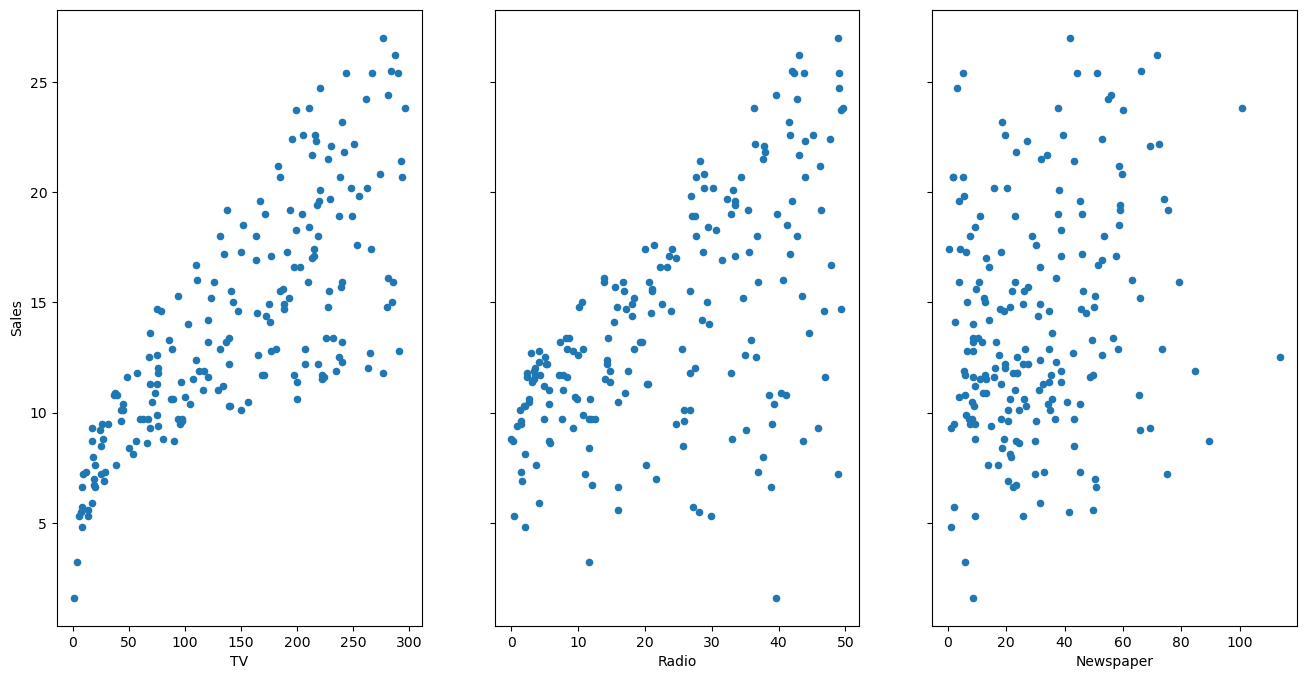

In [4]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

</figure>
<img src="https://www.dropbox.com/s/65mihrlxzdve48g/08_estimating_coefficients.png?dl=1" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
</figure>


What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

</figure>
<img src="https://www.dropbox.com/s/bg7z9k3mne5zop9/08_slope_intercept.png?dl=1" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
</figure>


Let's use **Statsmodels** to estimate the model coefficients for the advertising data:

In [40]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
lm = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [6]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of **9,409 widgets** in that market.

Of course, we can also use Statsmodels to make the prediction:

In [7]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})
X_new.head()

,TV
0,50


In [8]:
# use the model to make predictions on a new value
lm.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line

Let's make predictions for the **smallest and largest observed values of x**, and then use the predicted values to plot the least squares line:

In [9]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
X_new.head()

,TV
0,0.7
1,296.4


In [10]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0     7.065869
1    21.122454
dtype: float64

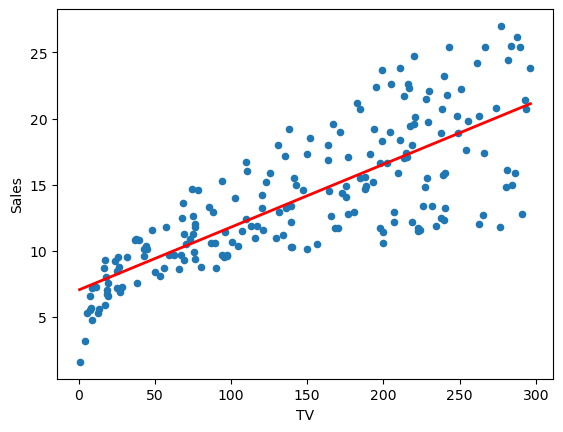

In [11]:
# first, plot the observed data
data.plot(kind='scatter', x='TV', y='Sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

## Hypothesis Testing and p-values
Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [12]:
# print the p-values for the model coefficients
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":


</figure>
<img src="https://www.dropbox.com/s/p937tyo5w16ssuu/08_r_squared.png?dl=1" alt="drawing" width="500" style="display: block; margin: 0 auto"/>
</figure>

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [13]:
# print the R-squared value for the model
lm.rsquared

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [14]:
# create a fitted model with all three features
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [15]:
# print a summary of the fitted model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.58e-96
Time:                        21:34:03   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check the collinearity between predictors
- Check whether the R-squared value goes up when you add new predictors.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

First, let's check the collinearity between TV, radio, and newspaper. What would it mean for deciding on a strategy, if for instance, the correlation between TV and Radio were 1? A good rule of thumb is if the Variance Inflation Factor (VIF) $\frac{1}{1-R^2}$ is 5 or above. 

In [16]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Since the correlation is pretty low here, we should not be too worried. As a rule of thumb, anything about 0.6 or above, I will do Variance Inflation Factor tests, where we find
$$
VIF = \frac{1}{1-R_i^2}
$$
where $i$ is the independent variable in question and we regress it on all the other independent variables

In [17]:
lm_vif=smf.ols(formula='Radio ~ Newspaper + Sales', data=data).fit()
print("VIF for Radio is ", 1/(1-lm_vif.rsquared))

VIF for Radio is  1.6241296734772357


In [18]:
# only include TV and Radio in the model
lm = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm.rsquared

0.8971942610828957

In [19]:
lm.rsquared_adj

0.8961505479974429

In [20]:
# add Newspaper to the model (which we believe has no association with Sales)
lm = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).


In [21]:
lm.rsquared_adj

0.8956373316204668

## Linear Regression in scikit-learn

Let's redo some of the Statsmodels code above in scikit-learn:

In [22]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales
y = data['Sales']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594103
[ 0.04576465  0.18853002 -0.00103749]


In [23]:
# pair the feature names with the coefficients
# zip(feature_cols, lm.coef_)

In [24]:
# predict for a new observation
lm.predict(np.array([100, 25, 25]).reshape(1, -1))

/Users/tangjiaxuan/opt/anaconda3/envs/gds_py/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.20266701])

In [25]:
# calculate the R-squared
lm.score(X, y)

0.8972106381789521

Note that **p-values** and **confidence intervals** are not (easily) accessible through scikit-learn.

## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [26]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [27]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **IsLarge** predictor:

In [28]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 0.04571982092436276), ('Radio', 0.1887281431342786), ('Newspaper', -0.0010976794483515961), ('IsLarge', 0.05742385085482783)]


How do we interpret the **IsLarge coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a Small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [29]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create **another dummy variable**:

In [30]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do we only need **two dummy variables, not three?** Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [31]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.Sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
print(list(zip(feature_cols, lm.coef_)))

[('TV', 0.04574401036331372), ('Radio', 0.18786669552525814), ('Newspaper', -0.0010876977267108845), ('IsLarge', 0.0773966074974793), ('Area_suburban', -0.10656299015958617), ('Area_urban', 0.2681380216522009)]


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

## Q.1


The chief of automobile maintenance for the city of Normal feels that maintenance costs on high-mileage cars are much higher than those costs for low-mileage cars. The maintenance chief regresses yearly maintenance costs for a sample of 200 cars on each car's total mileage for the year. She finds the following: 
$$
\hat{Y} = \$50 + 0.030X
$$
where $Y$ is the maintenance cost (in dollars) for the year and $X$ is the mileage on the car. 

**(a)** Is there a relationship between maintenance costs and mileage? (1 pt)

**(b)** What are the predicted maintenance costs of a car with 50,000 miles? (1 pt) 

**(c)** The maintenance chief considers 1,000 dollars in maintenance a year excessive. For this criterion, how many miles will generate maintenance costs of 1,000 dollars?  (2 pt)

WRITE YOUR ANSWERS DOWN HERE. 

Answer A: Yes there is a relationship between these two variables. Here from the regression result we can say that holding other uncontorlled factors fixed, every one more mileage of a car will on average bring 0.03 dollars of maintenance cost.

Answer B: According to the result, we can predict that it will cost $50 + 0.03 \times 50000 = 1550$ dollars.

Answer C: According to the result, let's use $x$ here to represent the mile number and we can get $50 + 0.03x = 1000$, therefore $x = 31666.67$. So 31,666.67 miles will generate maintenance costs of 1,000 dollars.



## Q.2
The Wisconsin Association of School Districts is interested in the relationship between school district population and funding for schools. From a sample of 300 school districts, the association uses simple regression to predict total school district expenditures in dollars ($Y$) using the school district's population ($X$ = number of persons residing in the district). It finds 
$$
\hat{Y} = 4,566 + 824X
$$
Where the $R^2$ = 0.78, p-value for the intercept is 0.23 and the p-value for the slope is 0.01. 

Express in plain English the interpretations of the following in this scenario: 

**(a)** the intercept (1 pt)

**(b)** the slope (1 pt)

**(c)** the p-value for the intercept (1 pt)

**(d)** the p-value for the slope (1 pt)

Answer A: The value for the intercept term in this model is 4566. Technically, this would mean the average total school district expenditures is 4566 dollars when the population is equal to zero. This does not make sense to interpret since it’s not possible for a district to have zero population. However, we still need to keep the intercept term in the model in order to use the model to make predictions. The intercept just doesn’t have any meaningful interpretation for this model.

Answer B: The slope here in this model is 824, which means on average, one more person in a given school district will bring a 824 dollor more expenditure to this district.

Answer C: The p-value 'represents' the probability that the coefficient is actually zero (aka, cannot reject the null hypothesis). We know that p-value less than 0.05 means that we have 95% confidence level to reject the null hypothesis, which is often taken as a standard. Here the p-value for the intercept is 0.23, which means we are not likely to reject the  null hypothesis. It means the intercept is not significant. However, as intercepts are often not so important in our regression model, unless we can prove $y = 0$ when $x = 0$, we always tend to keep the intercept even if it's not significant.

Answer D: As explained in the last question, we use p-value to determine if the coefficient is  significant and we usually take p = 0.05 as a threshold. Here the p-value of slope is 0.01, less than 0.05. So we can say that the coefficient of the slope is significant. That is to say, we believe there is a relationship between the population and the expenditures.

## Q.3
Dick Engstrom and Mike MacDonald are interested in the relationship between African-American representation on city councils and the structure of the electoral system. Their independent variable is the percentage of African Americans in the population; their dependent variable is the percentage of seats on the city council that are held by African Americans. Engstrom and MacDonald want to compare representation under single-member district election systems and under at-large election systems. They get the following results: 

**At-large systems**
$$
\hat{Y} = 0.348 + 0.495X
$$ with $R^2$ = 0.34

**Single-Member District System**
$$
\hat{Y} = -0.832 + 0.994X
$$ with $R^2$ = 0.816

For each equation, interpret the slope, intercept, and $R^2$. Get the predicted city council representation of a city with 25% African-American population under both systems. What can you say about the relative representation of African Americans under each type of system? (3 pts)

Explains:

Slope: For at-large systems, keeping other factors fixed, one more percentage of African Americans in the population will on average bring 0.495% more seats held by African Americans in the city concil. For single-member district systems, keeping other factors fixed, one more percentage of African Americans in the population will on average bring 0.994% more seats held by African Americans in the city concil.

Intercept: For at-large systems, if there is 0% of African Americans in the population, there will be 0.348% seats in the city concil held by African Americans. For single-member district systems, if there is 0% of African Americans in the population, there will be -0.832% seats in the city concil held by African Americans, which doesn't mean anything in the real situation, just for the model to make predictions.

R-square: For both models, R-square means how many percentage of observed data can be explained by the model, hence it can be used to determin if the model is good enough.

Predictions:

At-large systems: $0.348 + 0.495 \times 25 = 12.723$. So there will be 12.723% African American seats in the city concil.

Single-member district systems: $-0.832 + 0.994 \times 25 = 24.018$. So there will be 24.018% African American seats in the city concil.

I'd say it seems single-member district systems seems to refelect the interests of African American people, since in this system the percentage of their seats in the city concil seems to match their portion in the population better.

## Q.4

We would like to predict the mileage per gallon (`mpg`) for a sample of cars and evaluate our model. We will be using the `mtcars.csv` dataset (see below). 

In [1]:
import pandas as pd
dfcars = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')

Now, we need to choose ONE variable that we think will be good predictors for the dependent variable `mpg`.

**(a)**: Pick ONE variable to use as a predictor for simple linear regression. Create a markdown cell below and discuss your reasons. You may want to justify this with some visualizations. Is there a second variable you'd like to use as well, say for multiple linear regression with two predictors? (3 pts)

In [2]:
## Insert your code here
dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<AxesSubplot: xlabel='carb', ylabel='mpg'>

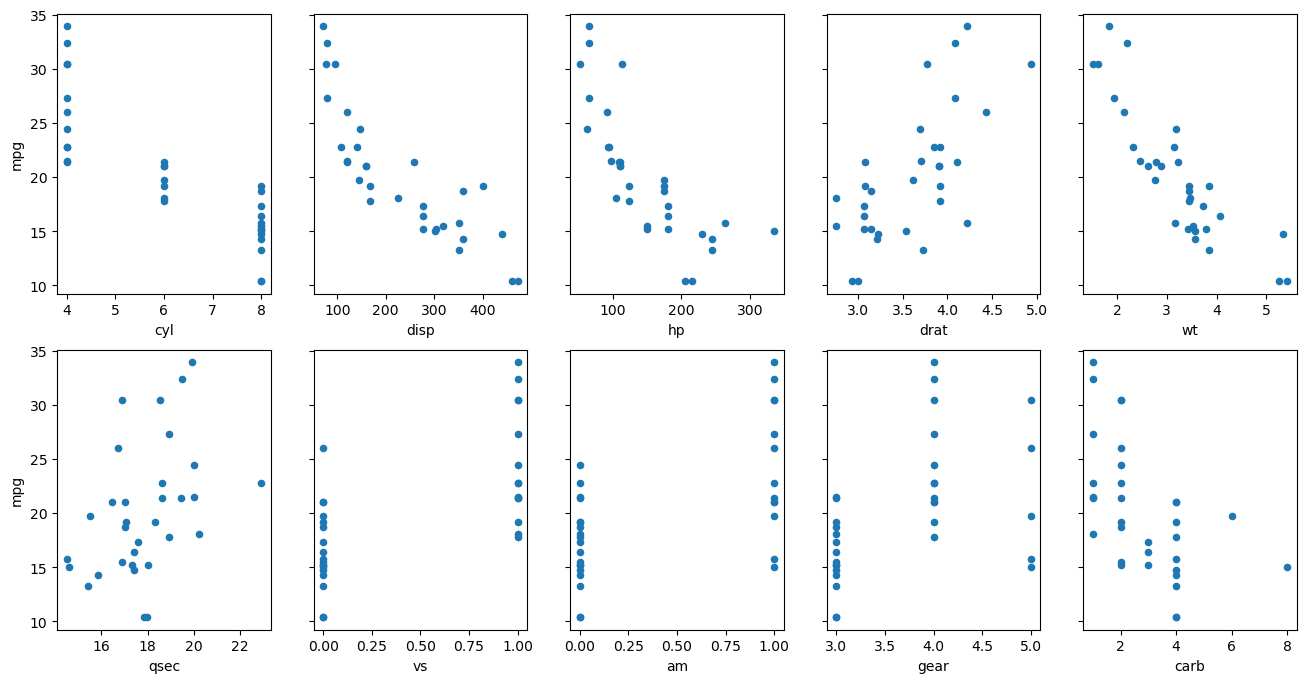

In [9]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 5, sharey=True)
dfcars.plot(kind='scatter', x='cyl', y='mpg', ax=axs[0][0], figsize=(16, 8))
dfcars.plot(kind='scatter', x='disp', y='mpg', ax=axs[0][1])
dfcars.plot(kind='scatter', x='hp', y='mpg', ax=axs[0][2])
dfcars.plot(kind='scatter', x='drat', y='mpg', ax=axs[0][3])
dfcars.plot(kind='scatter', x='wt', y='mpg', ax=axs[0][4])
dfcars.plot(kind='scatter', x='qsec', y='mpg', ax=axs[1][0])
dfcars.plot(kind='scatter', x='vs', y='mpg', ax=axs[1][1])
dfcars.plot(kind='scatter', x='am', y='mpg', ax=axs[1][2])
dfcars.plot(kind='scatter', x='gear', y='mpg', ax=axs[1][3])
dfcars.plot(kind='scatter', x='carb', y='mpg', ax=axs[1][4])

Answer: If I need to choose one variable, from the graph above, I will choose 'wt' (weight), since it seems to be highly correlated with mpg according to the graph. If I want to choose second variable, I will do 'hp' (horsepower) for the same reason: from the graph it seems to be highly correlated with mpg.

**(b)**: Fit your dependent and independent variables using simple linear regression. Print out the regression summary and explain what the intercept, coefficients, $R^2$, and p-values for each outcome tells us. Plot the data and the prediction.  (3 pts)

In [10]:
## INSERT YOUR CODE HERE

# Fit your model here
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='mpg ~ wt', data=dfcars).fit()
lm1.params


Intercept    37.285126
wt           -5.344472
dtype: float64

In [11]:
## INSERT YOUR CODE HERE

# Print the results summary from your model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     91.38
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.29e-10
Time:                        23:33:52   Log-Likelihood:                -80.015
No. Observations:                  32   AIC:                             164.0
Df Residuals:                      30   BIC:                             167.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2851      1.878     19.858      0.000      33.450      41.120
wt            -5.3445      0.559     -9.559      0.000      -6.486      -4.203
==============================================================================
Omnibus:                        2.988   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.225   Jarque-Bera (JB):                2.399
Skew:                           0.668   Prob(JB):                        0.301
Kurtosis:                       2.877   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explains:

Intercept: The value for the intercept term in this model is 37.2851. Technically, this would mean the average mpg (miles per gallon) data is 37.2851 when the wt (weight) is equal to zero. This does not make sense to interpret since it’s not possible for a car to have zero weight. However, we still need to keep the intercept term in the model in order to use the model to make predictions. The intercept just doesn’t have any meaningful interpretation for this model.

Coefficient of wt: The cofeeicient here in this model is -5.3445, which means on average, one more unit of weight (here it is 1000 lbs) of a car will make the car drive 5.3445 fewer miles on a single gallon of gas.

R-square: R-square here in this model is 0.753. It's pretty high, which means 75.3% of observed data is explained by outr model. In most cases, a higher R-square means a better model.

p-value of intercept: It's 0.000, which means the intercept is significant.

p-value of the coefficient of wt: It's 0.000, which means the coefficient of wt is significant. Aka, wt is a meaningful variable in our model.



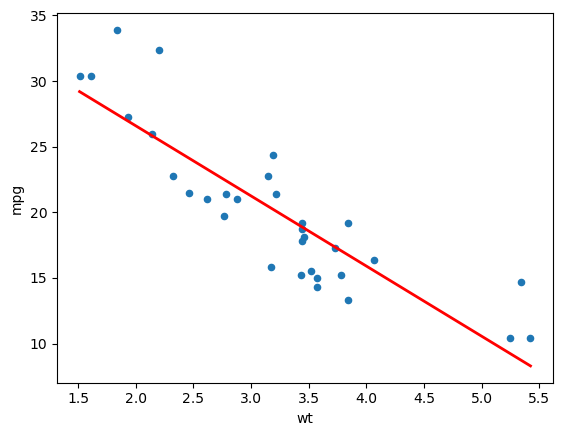

In [13]:
## INSERT YOUR CODE HERE

# Plot your data and the prediction here
# create a DataFrame with the minimum and maximum values of TV
X_new1 = pd.DataFrame({'wt': [dfcars.wt.min(), dfcars.wt.max()]})

# make predictions for those x values and store them
preds1 = lm1.predict(X_new1)

# first, plot the observed data
dfcars.plot(kind='scatter', x='wt', y='mpg')

# then, plot the least squares line
plt.plot(X_new1, preds1, c='red', linewidth=2)


## Q.5

Fit the data using multiple linear regression with TWO predictors. Create two models with two predictors each. Use these models to make `mpg` predictions. Print out the regression summary and explain what the intercept, coefficients, $R^2$, and p-values for each outcome tells us. Plot the data and the predictions (3 pts)

In [24]:
## INSERT YOUR CODE HERE

# Fit your TWO models here
# Model 1: using drat and hp (two continuous variables)
lm2 = smf.ols(formula='mpg ~ drat + hp', data=dfcars).fit()
lm2.params

Intercept    10.789861
drat          4.698158
hp           -0.051787
dtype: float64

In [26]:

# Model 2: using hp and vs (one continuous variable and one dummy variable)
lm3 = smf.ols(formula='mpg ~ drat + vs', data=dfcars).fit()
lm3.params

Intercept   -1.825317
drat         5.436549
vs           5.401262
dtype: float64

In [25]:
## INSERT YOUR CODE HERE

# Print the results summary from your TWO models here
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           3.08e-09
Time:                        00:18:07   Log-Likelihood:                -80.752
No. Observations:                  32   AIC:                             167.5
Df Residuals:                      29   BIC:                             171.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.7899      5.078      2.125      0.042       0.405      21.175
drat           4.6982      1.192      3.943      0.000       2.261       7.135
hp            -0.0518      0.009     -5.573      0.000      -0.071      -0.033
==============================================================================
Omnibus:                        5.471   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.065   Jarque-Bera (JB):                4.237
Skew:                           0.877   Prob(JB):                        0.120
Kurtosis:                       3.317   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     24.53
Date:                Tue, 21 Mar 2023   Prob (F-statistic):           5.82e-07
Time:                        00:18:40   Log-Likelihood:                -86.536
No. Observations:                  32   AIC:                             179.1
Df Residuals:                      29   BIC:                             183.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8253      4.903     -0.372      0.712     -11.853       8.202
drat           5.4365      1.421      3.826      0.001       2.530       8.343
vs             5.4013      1.507      3.583      0.001       2.318       8.484
==============================================================================
Omnibus:                        0.243   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.886   Jarque-Bera (JB):                0.440
Skew:                           0.059   Prob(JB):                        0.803
Kurtosis:                       2.438   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Explains:

Model 1: 

Intercept: When drat (driveshaft ratio) and hp (horsepower) are both zero, a car will on average drive 10.79 miles on one gallon of gas. This is just a technical number with no meaning in real life.

Coefficients: When drat (driveshaft ratio) increase by 1 unit, keeping other factors fixed, a car will on average drive 4.70 more miles on one gallon of gas. When hp (horsepower) increase by 1 unit, keeping other factors fixed, a car will on average drive 0.05 fewer miles on one gallon of gas.

R-square: R-square of 0.741 means 74.1% of observed data can be explained by the model 1.

P-values: P-values of the intercept and both coefficients are under 0.05, which means they are all significant on a 95% level.

Model 2: 

Intercept: When drat (driveshaft ratio) is zero and vs = 0 (straight engine shape), a car will on average drive -1.83 miles on one gallon of gas. This is just a technical number with no meaning in real life.

Coefficients: When drat (driveshaft ratio) increase by 1 unit, keeping other factors fixed, a car will on average drive 5.44 more miles on one gallon of gas. A car using V-shape engine (vs = 1) will on average drive 5.40 more miles on one gallon of gas compared to a car with straight engine (vs = 0), controlling other factors fixed.

R-square: R-square of 0.628 means 62.8% of observed data can be explained by the model 2.

P-values: P-values of the intercept is larger than 0.05, which means it's not significant on 95% level. But it won't mean much to the model since in this model the intercept doesn't have much reallife meaning, can we mostly care about the two coefficients. P-values of the both coefficients are under 0.05, which means they are all significant on a 95% level.

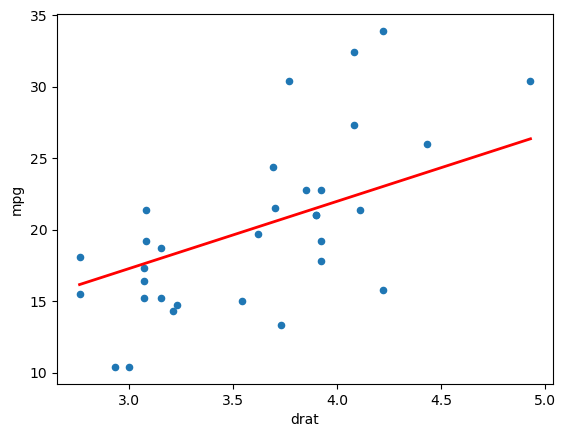

In [37]:
## INSERT YOUR CODE HERE

# Plot your data and the predictions from your TWO models here (separately)
# Model 1 - drat - keep hp to average
# create a DataFrame with the minimum and maximum values
X_new2 = pd.DataFrame({'drat': [dfcars.drat.min(), dfcars.drat.max()], 'hp':[dfcars.hp.mean(),dfcars.hp.mean()]})

# make predictions for those x values and store them
preds2 = lm2.predict(X_new2)

# first, plot the observed data
dfcars.plot(kind='scatter', x='drat', y='mpg')

# then, plot the least squares line
plt.plot(X_new2['drat'], preds2, c='red', linewidth=2)

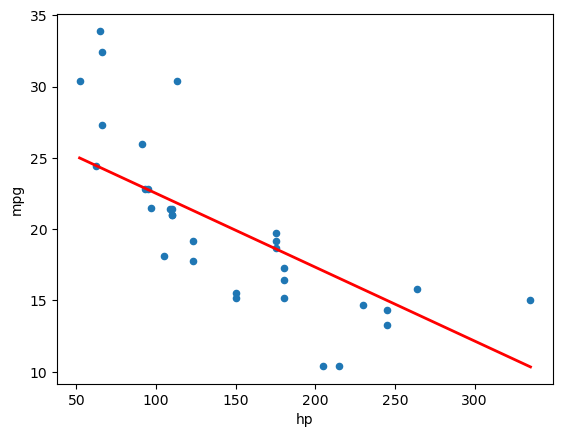

In [38]:
# Model 1 - hp - keep drat to average
# create a DataFrame with the minimum and maximum values
X_new3 = pd.DataFrame({'hp': [dfcars.hp.min(), dfcars.hp.max()], 'drat':[dfcars.drat.mean(),dfcars.drat.mean()]})

# make predictions for those x values and store them
preds3 = lm2.predict(X_new3)

# first, plot the observed data
dfcars.plot(kind='scatter', x='hp', y='mpg')

# then, plot the least squares line
plt.plot(X_new3['hp'], preds3, c='red', linewidth=2)

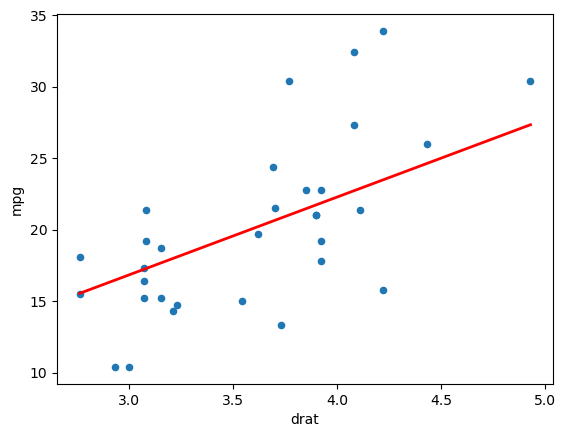

In [39]:
# Model 2 - drat - keep vs to average
# create a DataFrame with the minimum and maximum values
X_new4 = pd.DataFrame({'drat': [dfcars.drat.min(), dfcars.drat.max()], 'vs':[dfcars.vs.mean(),dfcars.vs.mean()]})

# make predictions for those x values and store them
preds4 = lm3.predict(X_new4)

# first, plot the observed data
dfcars.plot(kind='scatter', x='drat', y='mpg')

# then, plot the least squares line
plt.plot(X_new4['drat'], preds4, c='red', linewidth=2)

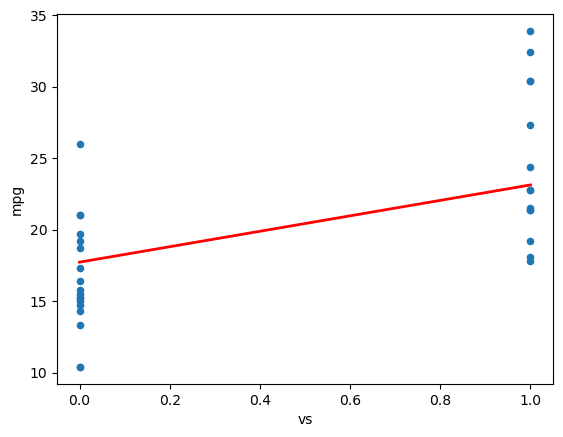

In [40]:
# Model 2 - vs - keep drat to average
# create a DataFrame with the minimum and maximum values
X_new5 = pd.DataFrame({'vs': [dfcars.vs.min(), dfcars.vs.max()], 'drat':[dfcars.drat.mean(),dfcars.drat.mean()]})

# make predictions for those x values and store them
preds5 = lm3.predict(X_new5)

# first, plot the observed data
dfcars.plot(kind='scatter', x='vs', y='mpg')

# then, plot the least squares line
plt.plot(X_new5['vs'], preds5, c='red', linewidth=2)

How do the results from the two models differ? What can you say about which model is better in terms of prediction? (1 pt)

The coefficients of independent variables are different (even for the same variable) in two models. That's because we choose different variables in two models and they have different extent of multicollinearity between the variables. Here we can say that the Model 1 is better in terms of prediction, since it has a higher R-square (0.741>0.628) or adjusted R-square (0.723>0.603).